# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [3]:
# YOUR CODE HERE
wine = pd.read_csv("wine_quality_red.tsv.gz",sep="\t").dropna(axis=1)
wine.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
280,11.4,0.260,0.44,3.6,0.071,6.0,19.0,0.99860,3.12,0.82,9.3,6
1071,7.5,0.770,0.20,8.1,0.098,30.0,92.0,0.99892,3.20,0.58,9.2,5
141,8.3,0.715,0.15,1.8,0.089,10.0,52.0,0.99680,3.23,0.77,9.5,5
320,9.8,0.660,0.39,3.2,0.083,21.0,59.0,0.99890,3.37,0.71,11.5,7
723,7.1,0.310,0.30,2.2,0.053,36.0,127.0,0.99650,2.94,1.62,9.5,5
1571,6.4,0.380,0.14,2.2,0.038,15.0,25.0,0.99514,3.44,0.65,11.1,6
975,7.2,0.410,0.30,2.1,0.083,35.0,72.0,0.99700,3.44,0.52,9.4,5
89,7.0,0.620,0.08,1.8,0.076,8.0,24.0,0.99780,3.48,0.53,9.0,5
1458,8.4,0.290,0.40,1.7,0.067,8.0,20.0,0.99603,3.39,0.60,10.5,5
677,8.6,0.800,0.11,2.3,0.084,12.0,31.0,0.99790,3.40,0.48,9.9,5


For this project, I chose to analyze the red susbet of the Wine Quality dataset. As this dataset has 12 columns including the target variable, I will limit later analysis that is requested per column to the first 10 columns.

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [4]:
# YOUR CODE HERE
wine.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'target']

The first 10 columns in the red subset of the Wine dataset are as follows: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, and sulphates. All of these variables are continuous and take on floating point values, meaning there are many possible values the variable could take on within the range between the minimum and maximum amounts of each column. According to the paper from Cortez et al., the fixed acidity column is measured in terms of g(tartaric acid)/dm^3 and may affect a wine's freshness and flavor. Volatile acidity, measured in g(acetic acid)/dm^3, could potentially affect the sweetness of a wine. The citric acid variable (g/dm^3) can be used to adjust the citrus flavor of a given wine. Residual sugar may determine a wine's sweetness and is measured in terms of g/dm^3. Further, chlorides (g(sodium chloride)/dm3) tend to affect the saltiness of wine. Free sulfur dioxide (in mg/dm^3) is used to prevent spoilage in wine. On the other hand, total sulfur dioxide (in mg/dm^3) can prevent oxidaton and maintain a wine's freshness. Density, which is measured in terms of g/cm^3, refers to a wine's properties that affect the flavor and grape quality. PH can affect a wine's flavor, color, and preservation through measuring the strength of acid. A lower pH is ideal in terms of stability and flavor. Finally, sulfates (in g(potassium sulphate)/dm^3) can be used to preserve wine as a preventative measure against spoilage. Overall, the features present in this data set are factors that are utilized to scientifically measure a red wine's comprehensive taste.

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

In [39]:
# YOUR CODE HERE

#Descriptive Statistics Table: to provide an overview of each column's distribution and characteristics
desc_stats = wine.describe()
desc_stats


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Text(0, 0.5, 'Predicted Quality')

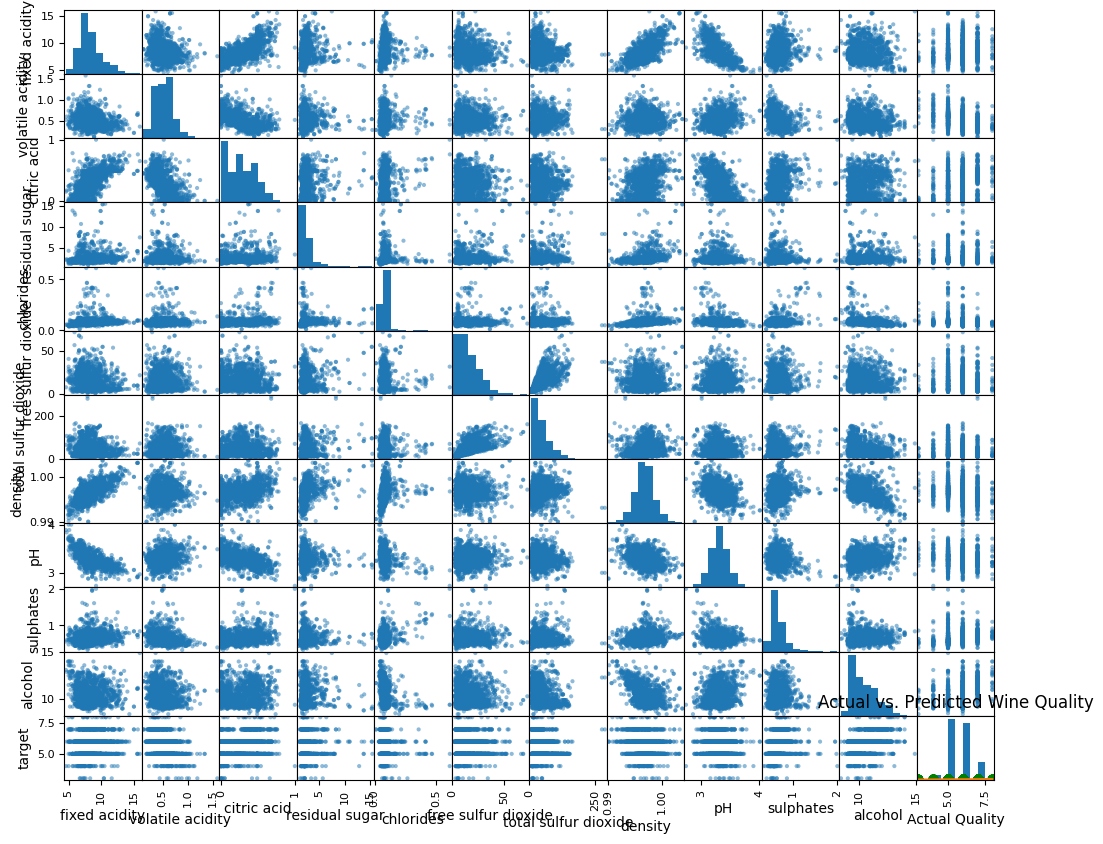

In [ ]:
#Scatterplot Matrix: to visualize relationship between columns and their distributions
scatter_matrix = pd.plotting.scatter_matrix(wine, figsize=(12,10))

#Linear Regression on all numeric variables
from sklearn.linear_model import LinearRegression
wine_features = wine.drop(columns="target")
wine_target = wine["target"]
wine_regr = LinearRegression()
wine_regr.fit(wine_features,wine_target)
wine_regr_preds = wine_regr.predict(wine_features)

#Plot predictions vs actual values to gauge degree of model accuracy
min_value = min(wine_target.min(),wine_regr_preds.min())
max_value = max(wine_target.max(),wine_regr_preds.max())
plt.plot([min_value,max_value],[min_value,max_value])
plt.scatter(wine_target,wine_regr_preds,color="green")
plt.title("Actual vs. Predicted Wine Quality")
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")

#Decision Tree Regression Model
import sklearn.tree
decision_tree_model = sklearn.tree.DecisionTreeRegressor(max_depth=5)
decision_tree_model.fit(wine_features,wine_target)
model_predictions = decision_tree_model.predict(wine_features)
model_score = decision_tree_model.score(wine_features,wine_target)
print(model_score)
plt.plot([min_value,max_value],[min_value,max_value],label="actual=predicted")
plt.scatter(model_predictions,wine_target)
plt.legend()
plt.title("Decision Tree, Max Depth 5 Actual vs Predicted Wine Quality (R^2 = 0.46)")
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")


YOUR ANSWERS HERE

In [ ]:
#Chart 1: Scatterplot Matrix
pd.plotting.scatter_matrix(wine, figsize=(12,10))

YOUR ANSWERS HERE

Text(0, 0.5, 'Predicted Quality')

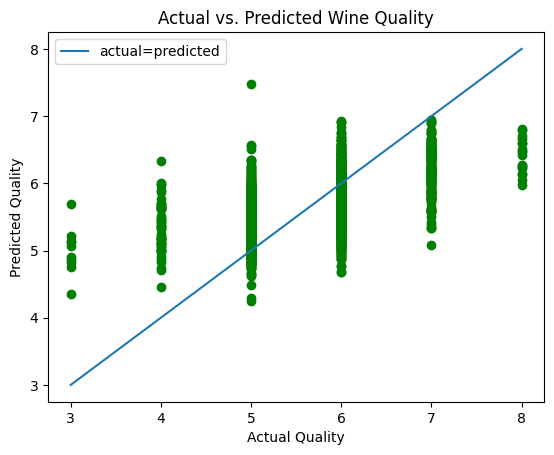

In [70]:
#Chart 2: Actual vs. Predicted Wine Quality from Full Linear Regression Model
min_value = min(wine_target.min(),wine_regr_preds.min())
max_value = max(wine_target.max(),wine_regr_preds.max())
plt.plot([min_value,max_value],[min_value,max_value],label="actual=predicted")
plt.scatter(wine_target,wine_regr_preds,color="green")
plt.title("Actual vs. Predicted Wine Quality")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")

YOUR ANSWERS HERE

0.4627584023894983


Text(0, 0.5, 'Predicted Quality')

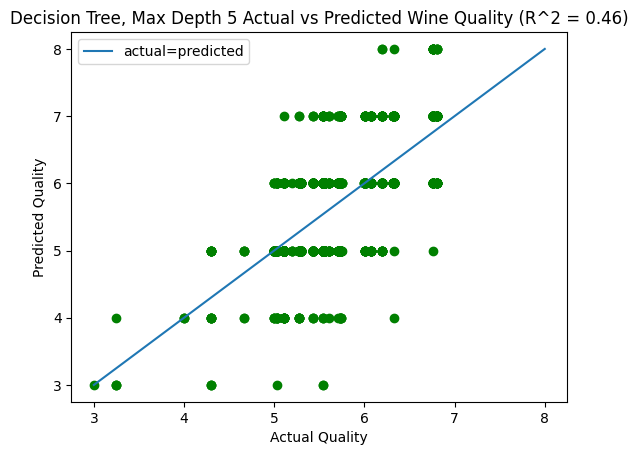

In [ ]:
#Chart 3: Decision Tree Regression for Actual vs Predicted Wine Quality
import sklearn.tree
decision_tree_model = sklearn.tree.DecisionTreeRegressor(max_depth=5)
decision_tree_model.fit(wine_features,wine_target)
model_predictions = decision_tree_model.predict(wine_features)
model_score = decision_tree_model.score(wine_features,wine_target)
print(model_score)
plt.plot([min_value,max_value],[min_value,max_value],label="actual=predicted")
plt.scatter(model_predictions,wine_target,color="green")
plt.legend()
plt.title("Decision Tree, Max Depth 5 Actual vs Predicted Wine Quality (R^2 = 0.46)")
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")

YOUR ANSWERS HERE

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

<Figure size 1200x1200 with 0 Axes>

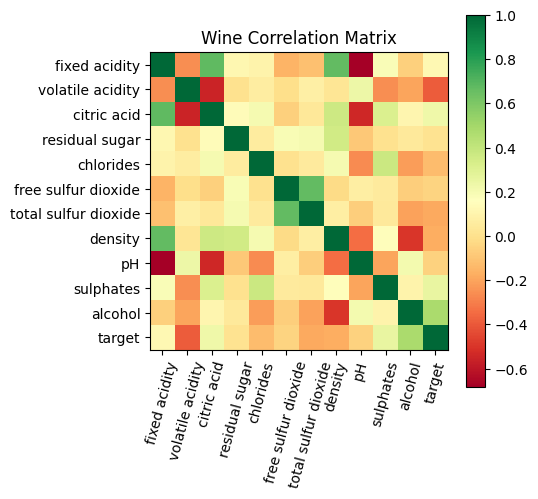

In [6]:
# YOUR CODE HERE
#calculates the correlation between all numeric variables
wine_corr = wine.corr(numeric_only=True)

#creates a correlation matrix plot from the correlation coefficients calculated above
plt.figure(figsize=(12,12))
plt.matshow(wine.corr(numeric_only=True),cmap="RdYlGn")
plt.xticks(range(len(wine_corr.columns)),wine_corr.columns,rotation=75)
plt.yticks(range(len(wine_corr.columns)),wine_corr.columns)
plt.gca().xaxis.set_ticks_position("bottom")
plt.title("Wine Correlation Matrix")
plt.colorbar()

From the correlation matrix chart of the numeric variables in the red subset of the Wine dataset, it can be concluded that the "fixed acidity" and "pH" columns are the most correlated. This is because the colorbar legend indicates that the darkest colors where pairs intersect have the highest correlation coefficients (between -1 and 1). A dark red means that intersecting columns have a high negative correlation and a dark green indicates a high positive correlation. Therefore, "Fixed acidity" and "pH" have a strong negative correlation, meaning they are inversely dependent on one another. As the amount of "fixed acidity" increases in wine, the wine's "pH" decreases. As a wine's "pH" increases, its "fixed acidity" level decreases accordingly.

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

In [29]:
# YOUR CODE HERE
#Establish Training and Testing Data
wine_features = wine.drop(columns="target")
wine_target = wine["target"]

#Ridge Regression
from sklearn.linear_model import Ridge
wine_ridge = Ridge()
wine_ridge.fit(wine_features,wine_target)
ridge_predictions = wine_ridge.predict(wine_features)
print("Ridge Model Predictions:",ridge_predictions)

#Lasso Regression
from sklearn import linear_model
wine_lasso = linear_model.Lasso()
wine_lasso.fit(wine_features,wine_target)
lasso_predictions = wine_lasso.predict(wine_features)
print("Lasso Model Predictions:",lasso_predictions)

#ElasticNet Regression
from sklearn.linear_model import ElasticNet
wine_elastic_net = ElasticNet()
wine_elastic_net.fit(wine_features, wine_target)
elastic_net_predictions = wine_elastic_net.predict(wine_features)
print("Elastic Net Model Predictions:",elastic_net_predictions)


Ridge Model Predictions: [5.04323344 5.13506106 5.21178615 ... 5.94951412 5.45943952 6.00483274]
Lasso Model Predictions: [5.68114902 5.56170729 5.60876009 ... 5.65943234 5.64495456 5.65219345]
Elastic Net Model Predictions: [5.68655925 5.55296038 5.60492477 ... 5.6645617  5.64856125 5.65470672]


Ridge Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge

How Ridge Regression Works: https://www.geeksforgeeks.org/machine-learning/what-is-ridge-regression/

Lasso Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso

How Lasso Regression Works: https://www.ibm.com/think/topics/lasso-regression

ElasticNet Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet

How ElasticNet Regression Works: https://www.geeksforgeeks.org/machine-learning/implementation-of-elastic-net-regression-from-scratch/

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

In [8]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [9]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [10]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

In [11]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

In [12]:
# YOUR CODE HERE

YOUR ANSWERS HERE